## Lending Club Case Study

__Group Members:__
1. Divyam Kumar
2. Abhishek Kumar

### Business Objective :

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. . When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

<b>The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.</b>

#### Exploratory Data Analysis
Import all the required libraries for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')

G:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Data Understanding
The Data contains the complete loan data for all loans issued through the time period 2007 to 2011.

In [2]:
#Import the dataSet
loan=pd.read_csv('loan.csv',encoding="ISO-8859-1")
loan.head()

G:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
loan.shape

(39717, 111)

In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Data Cleaning

In [6]:
#missing values expressed as % of total number of values in that column
missing=round(100*(loan.isnull().sum()/len(loan.id)),2)
missing.loc[missing>0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [7]:
#We will remove the columns with more than 50% reamining values
columns_with_missing_values=list(missing[missing>=50].index)
len(columns_with_missing_values)

57

In [8]:
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 54)

In [9]:
#Again check for missing values
missing=round(100*(loan.isnull().sum()/len(loan.id)),2)
missing[missing!=0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [10]:
#lets remove the desc columns as its has 32.58% null values
loan=loan.drop('desc',axis=1)

In [11]:
loan.shape

(39717, 53)

In [12]:
#check for unique values in columns with null
print("unique values in emp_title is {}".format(len(loan.emp_title.unique())))
print("unique values in emp_length is {}".format(len(loan.emp_length.unique())))
print("unique values in title is {}".format(len(loan.title.unique())))
print("unique values in revol_util is {}".format(len(loan.revol_util.unique())))
print("unique values in last_pymnt_d is {}".format(len(loan.last_pymnt_d.unique())))
print("unique values in collections_12_mths_ex_med is {}".format(len(loan.collections_12_mths_ex_med.unique())))
print("unique values in chargeoff_within_12_mths is {}".format(len(loan.chargeoff_within_12_mths.unique())))
print("unique values in pub_rec_bankruptcies is {}".format(len(loan.pub_rec_bankruptcies.unique())))
print("unique values in tax_liens is {}".format(len(loan.tax_liens.unique())))

unique values in emp_title is 28821
unique values in emp_length is 12
unique values in title is 19616
unique values in revol_util is 1090
unique values in last_pymnt_d is 102
unique values in collections_12_mths_ex_med is 2
unique values in chargeoff_within_12_mths is 2
unique values in pub_rec_bankruptcies is 4
unique values in tax_liens is 2


Clearly here for attributes emp_length, collections_12_mths_ex_med ,chargeoff_within_12_mths , pub_rec_bankruptcies and tax_liens are <b>Categorical variable</b> as they fall in range

In [13]:
#Chcek the unique values in emp_length
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [14]:
#Check the unique values in collections_12_mths_ex_med
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [15]:
#Check the unique values in chargeoff_within_12_mths
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [16]:
#Check the unique values in pub_rec_bankruptcies
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [17]:
#Check the unique values in tax_liens
loan.tax_liens.unique()

array([ 0., nan])

We can see that columns collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens has values 0 and nan only which is of no significant. We can drop these column.

In [18]:
drop_collist=['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens']
loan = loan.drop(drop_collist,axis=1)

In [19]:
loan.shape

(39717, 50)

Now we will look at pub_rec_bankruptcies column which has 1.75% of missing values

In [20]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

pub_rec_bankruptcies column has data about the past number of public record bankruptcies of that borrower.Here most of the values in this column is 0 so we decide to drop the rows with nan or 0 in it.

In [21]:
loan=loan[~loan['pub_rec_bankruptcies'].isnull()]

In [22]:
loan.shape

(39020, 50)

In [23]:
missing=round(100*(loan.isnull().sum()/len(loan.id)),2)
missing[missing!=0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

emp_title and emp_length has details about borrowers/customers job type and years of employment.We will remove rows with nan or blank values for these columns.

In [24]:
loan=loan[~loan["emp_title"].isnull()]
loan=loan[~loan["emp_length"].isnull()]

In [25]:
loan.shape

(36548, 50)

In [26]:
#Now remove other missing values
loan=loan[~loan["title"].isnull()]
loan=loan[~loan["revol_util"].isnull()]
loan=loan[~loan["last_pymnt_d"].isnull()]

In [27]:
loan.shape

(36433, 50)

Again cross check whether all missing values are removed or not

In [28]:
missing=round(100*(loan.isnull().sum()/len(loan.id)),2)
missing[missing!=0]

Series([], dtype: float64)

Now we have reduced data with 36433 entries and 50 attributes.Lets save it to a seperate file and use it for further analysis.

In [29]:
loan.to_csv('cleaned_loan.csv', encoding='utf-8', index=False)

<b>Lets now analyse the newly generated dataset and futher narrow down the number of columns so that we can start our analysis.</b>

In [30]:
cleaned_loan=pd.read_csv("cleaned_loan.csv",encoding='utf-8')

#or, clean_loan=loan[:]

In [31]:
cleaned_loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

There are a few columns having a single unique value or all unique values. These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default. Some other columns are redundant.We have been data dictionary file which conatins about each attribute.

<b>Let's refer the above count of number of unique value in each column and data dictionary and further narrow down number of attributes relevant to our analysis.</b>

- <b>acc_now_delinq</b> : The number of accounts on which the borrower is now delinquent.It has all values 0.
- <b>application_type</b>: Application is individiual type or joint.It has all value as INDIVIDUAL.so not relevant for analysis.
- Further columns <b>policy_code, initial_list_status, delinq_amnt, pymnt_plan, id, member_id, url </b> has either value 0 or all distinct values so we can remove these columns.

- <b>funded_amnt and funded_amnt_inv</b> has almost similar values to <b>loan_amnt</b> and can be removed to avoid multi colinearity between these columns and it wont be available for making analysis further.

- <b>zip_code</b>: first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis.

Lets the above described columns.

In [32]:
col_dropped_list=["acc_now_delinq","application_type","policy_code","initial_list_status","delinq_amnt","pymnt_plan","id","member_id",
            "url","funded_amnt","funded_amnt_inv","zip_code"]
cleaned_loan=cleaned_loan.drop(col_dropped_list,axis=1)

In [33]:
cleaned_loan.shape

(36433, 38)

Next, let's standardize the precision of the data. There are certain columns with need rounding of the values up until two decimal places.
These columns are:

- total_pymnt
- total_rec_late_fee
- collection_recovery_fee

In [34]:
pd.options.display.float_format = '{:,.2f}'.format

In [35]:
#check for total_pymnt
cleaned_loan["total_pymnt"].value_counts().tail()

10,417.38    1
14,040.77    1
8,954.81     1
4,561.08     1
4,608.00     1
Name: total_pymnt, dtype: int64

Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.
These columns are:
- issue_d
- last_credit_pull_d
- last_pymnt_d 
- earliest_cr_line

In [36]:
datetime_cols=["issue_d","last_credit_pull_d","last_pymnt_d","earliest_cr_line"]
cleaned_loan[datetime_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   last_credit_pull_d  36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   earliest_cr_line    36433 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


Converting the datatypes of above column as datetime

In [37]:
cleaned_loan["issue_d"]=pd.to_datetime(cleaned_loan["issue_d"],format='%b-%y')
cleaned_loan["last_credit_pull_d"]=pd.to_datetime(cleaned_loan["last_credit_pull_d"],format='%b-%y')
cleaned_loan["last_pymnt_d"]=pd.to_datetime(cleaned_loan["last_pymnt_d"],format='%b-%y')
cleaned_loan["earliest_cr_line"]=pd.to_datetime(cleaned_loan["earliest_cr_line"],format='%b-%y')

In [38]:
cleaned_loan[datetime_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36433 entries, 0 to 36432
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   last_credit_pull_d  36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   earliest_cr_line    36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.1 MB


Dropping duplicates if any

In [39]:
cleaned_loan=cleaned_loan.drop_duplicates()

In [40]:
cleaned_loan.shape

(36433, 38)

There are few columns expressed with % in it. So we can remove that and convert it to float.

In [41]:
cleaned_loan['int_rate'].describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [42]:
cleaned_loan['revol_util'].describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [43]:
cleaned_loan['int_rate']=cleaned_loan['int_rate'].str.replace('%','').astype('float')
cleaned_loan['revol_util']=cleaned_loan['revol_util'].str.strip('%').astype('float')

In [44]:
cleaned_loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 0 to 36432
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 853.9 KB


Now lets look at the <b>emp_length</b> column

In [45]:
cleaned_loan["emp_length"].value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

From data dictionary:
    emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. Lets convert the column to have values between 0 and 10.

In [46]:
emp_length_value={
    '< 1 year':0,
    '1 year':1,
    '2 years':2,
    '3 years':3,
    '4 years':4,
    '5 years':5,
    '6 years':6,
    '7 years':7,
    '8 years':8,
    '9 years':9,
    '10+ years':10
}

In [47]:
cleaned_loan=cleaned_loan.replace({"emp_length":emp_length_value})

In [48]:
cleaned_loan['emp_length'].value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

Column <b>term</b> :The number of payments on the loan. Values are in months and can be either 36 or 60 months.Removing the month string.

In [49]:
cleaned_loan['term']=cleaned_loan['term'].apply(lambda x : x.split()[0])

In [50]:
cleaned_loan['term'].value_counts()

36    26377
60    10056
Name: term, dtype: int64

<b>earliest_cr_line</b>: The month the borrower's earliest reported credit line was opened. Let's split the date column into earliest_cr_line_month and earliest_cr_line_year

Lets split the available date into month and year column

In [51]:
cleaned_loan['earliest_cr_line_year'] = cleaned_loan['earliest_cr_line'].dt.year
cleaned_loan['earliest_cr_line_month'] = cleaned_loan['earliest_cr_line'].dt.month

In [52]:
len(cleaned_loan[cleaned_loan['earliest_cr_line_year']>2011])

50

There are 50 records with the earliest credit line date greater than 2011(which is year till wich we have the data).
Lets see the data to understand why

In [53]:
cleaned_loan[cleaned_loan['earliest_cr_line_year']>2011]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

We can see that Year stored in two digits being interpreted as year in 21st century. Let's fix the entries.

In [54]:
cleaned_loan.loc[cleaned_loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = cleaned_loan['earliest_cr_line_year'] - 100

In [55]:
cleaned_loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

<b>issue_d</b>: The month which the loan was funded .Lets split the available date into month and year column.

In [56]:
cleaned_loan['issue_d_month']=cleaned_loan['issue_d'].dt.month
cleaned_loan['issue_d_year']=cleaned_loan['issue_d'].dt.year

Saving the final data after cleaning as master_loan.csv for further analysis

As we are studying how the Fully paid loan are different from the Charged off loans, loan_status = current, has been ingnored for analysis. Therefore out_prncp , out_prncp_inv , total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt,last_credit_pull_d variable can be removed or droped.

In [57]:
cleaned_loan.to_csv('master_loan.csv', encoding='utf-8', index=False)

### Analysis

Load the created master_loan data set.

In [58]:
master_loan=pd.read_csv('master_loan.csv',encoding='utf-8')

In [59]:
master_loan.shape

(36433, 42)

In [60]:
master_loan["loan_status"].value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

<b>Univariate and Segmented Univariate Analysis</b>

Define few methods to help in plottong the graphs.

In [61]:
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [62]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# (absolute numbers do not make sense -> category values can have very different absolute numbers)
# We want to see what are the chances of some category leading to loan default
# Absolute numbers are also printed to assess level of confidence in a % value. 
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [63]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.distplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [64]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    showLabels(ax)

<b>grade</b>: Lending club assigned loan Grade.
we will see the % of customers in each grade.

In [65]:
(master_loan['grade'].value_counts(normalize=True)*100).sort_index()

A   25.18
B   30.29
C   20.40
D   13.38
E    7.27
F    2.66
G    0.82
Name: grade, dtype: float64

<b>loan_status</b> : Current status of the loan is our key column.It has following values.
- <b>Fully paid</b>: Applicant has fully paid the loan (the principal and the interest rate).

- <b>Current</b>: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

- <b>Charged-off</b>: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan .

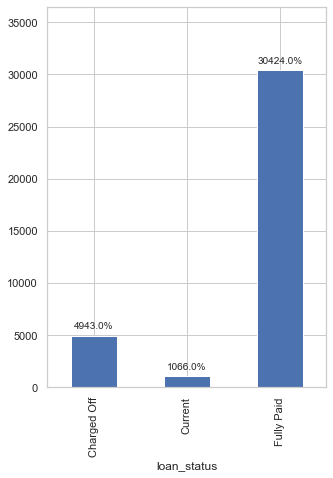

In [66]:
plt.figure(figsize=(5,7))
ax=master_loan.groupby('loan_status')['loan_amnt'].count().plot.bar()
showLabels(ax)
plt.show()

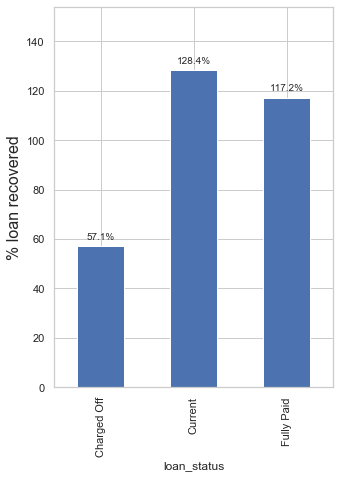

In [67]:
plt.figure(figsize=(5,7))
ax = (master_loan.groupby('loan_status').total_pymnt.sum() * 100 / master_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

### Lets analyse some other important variables using graphs

<b>loan_amnt</b> : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

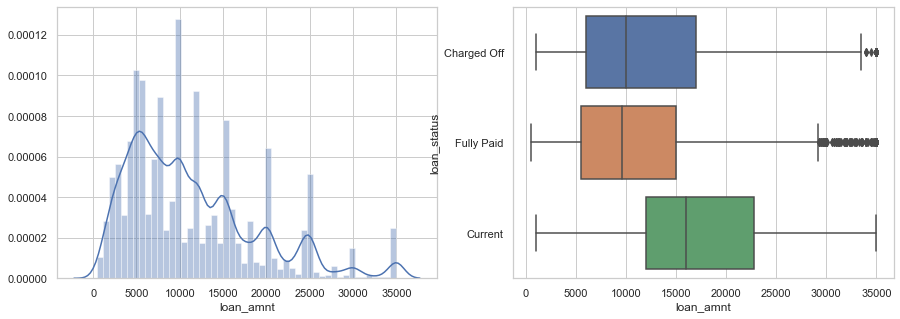

In [68]:
plot_distribution(master_loan,'loan_amnt')

In [69]:
master_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"4,943.00","12,286.15","8,064.26","1,000.00","6,000.00","10,000.00","17,000.00","35,000.00"
Current,"1,066.00","17,100.70","8,571.09","1,000.00","12,000.00","16,000.00","22,800.00","35,000.00"
Fully Paid,"30,424.00","10,945.73","7,181.87",500.00,"5,500.00","9,600.00","15,000.00","35,000.00"


__Observation:__

- Overall, the applied loan amount distribution is slightly right-skewed with mean greater than the median. Most of the loans granted are below 15000 (75 percentile value)
- Funding amounts see a spike around each 5000 boundary.
- Charged off loans are shifted towards higher average loan amount request.

In [70]:
#create derived categorical variable
master_loan['loan_amnt_bin']=pd.cut(master_loan['loan_amnt'],
                                    [x for x in range(0,36000,5000)],labels=[str(x)+"-"+str(x+5)+'k' for x in range(0,35,5)])

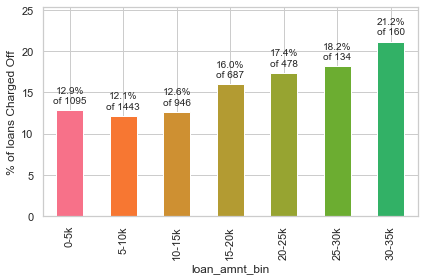

In [71]:
plotLoanStatus(master_loan, 'loan_amnt_bin')

__Observation:__
As we go to higher loan amount buckets, the % of Charged off loans increases.Mostly after 20k amount.Higher the loan amount though less in number, higher are chances of Default.

__Lets see someother categorical variables of intrest within dataset.__

In [72]:
def categoricalBarPlots(dataframe,attr):
    rows=int(len(attr)/2)
    for idx,val in enumerate(attr, start=1):
        plt.subplot(rows,2,idx)
        ax=dataframe.groupby(val)['loan_amnt'].count().plot.bar(color=sns.color_palette("RdBu",10))
        showLabels(ax)
    plt.tight_layout()

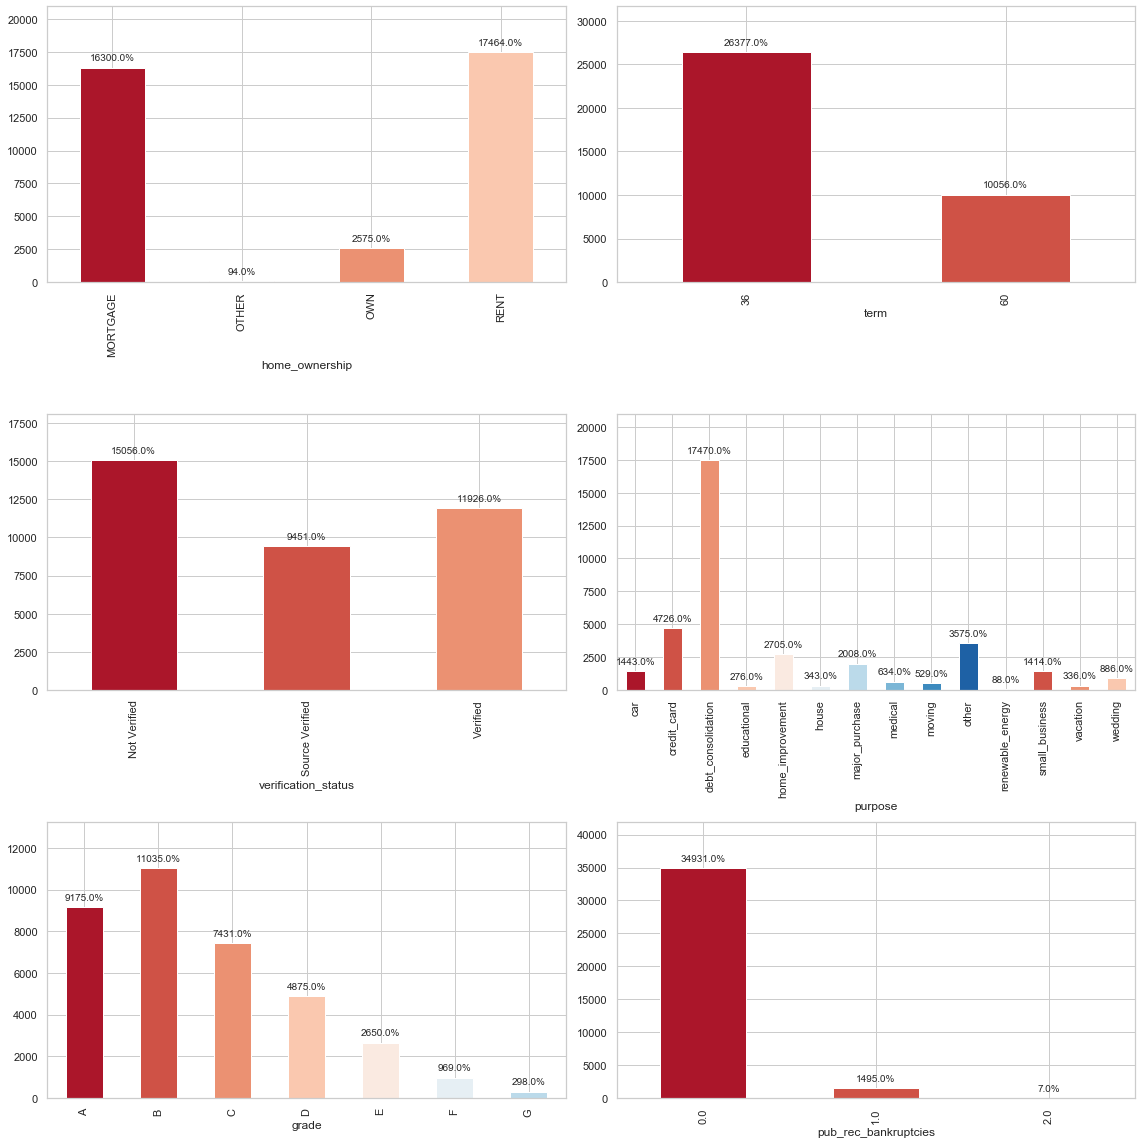

In [73]:
plt.figure(figsize=(16,16))

categoricalBarPlots(master_loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

__Obervations:__

- Most loans are for 36 month term.
- Very few loans are extended to people with prior record of bankruptcy.
- debt_consolidation is by far the largest 'purpose' for seeking a loan.
- Most approved loans are high grade.

__term:__The number of payments on the loan. Values are in months and can be either 36 or 60.

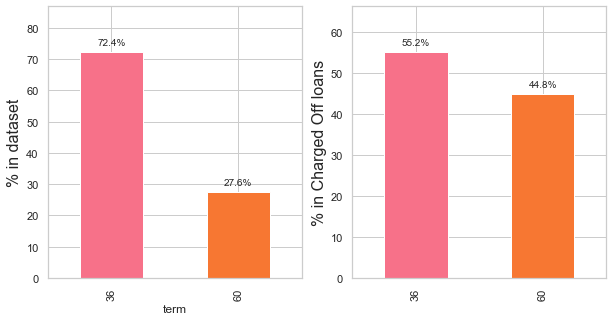

In [74]:
plt.figure(figsize=(10,5))
plot_percentages(master_loan, 'term')

__Observation:__

- Around 75% of the total loans are given for duration of 3 years. while just 25% of the loans are those given for 5 years.
- Among Charged Off loans, percentage of term 60 months rises to 45%.

__purpose:__A category provided by the borrower for the loan request.

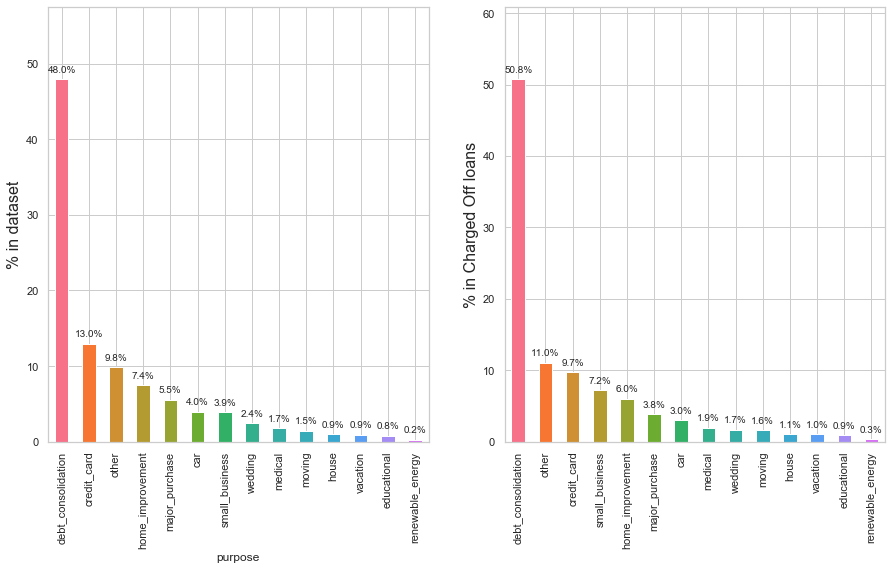

In [75]:
plt.figure(figsize=(15,8))
plot_percentages(master_loan,'purpose')

Lets further analyse further how categories this variable behaves.

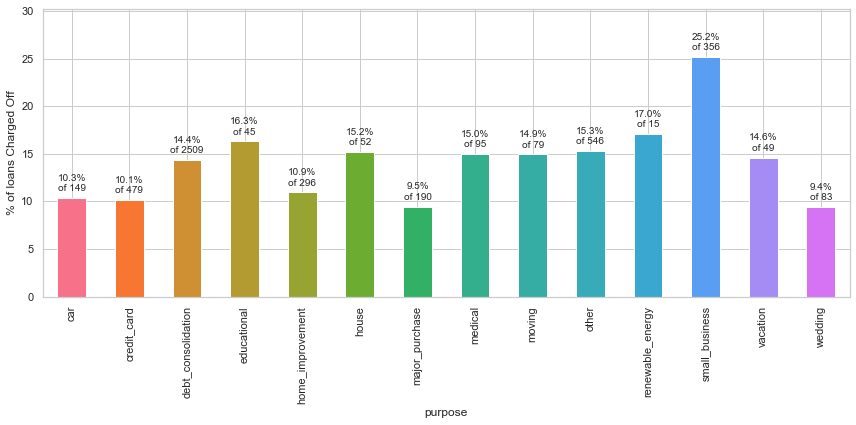

In [76]:
plt.figure(figsize=(12,6))
plotLoanStatus(master_loan, 'purpose')

__Observations:__

- Approximately ~49% of the loans are issued for the purpose of dept consolidation.
- 17% of the loans for renewable_enrgy are charged Off, but the number is too less to be of significance.

__pub_rec_bankruptcy:__Number of public record bankruptcies

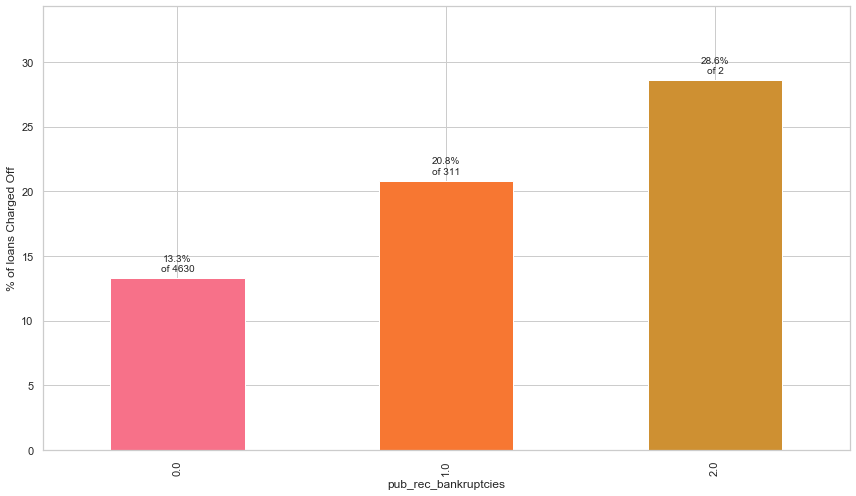

In [77]:
plt.figure(figsize=(12,7))
plotLoanStatus(master_loan, 'pub_rec_bankruptcies')

__int_rate:__ Interest rate on loan.

<Figure size 1080x360 with 0 Axes>

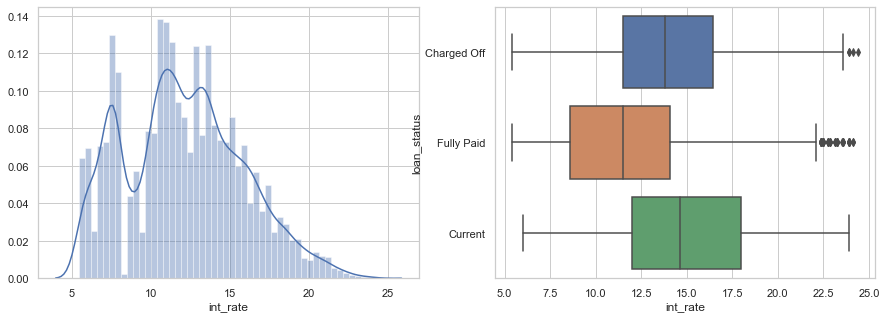

In [78]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'int_rate')

In [79]:
master_loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"4,943.00",13.93,3.65,5.42,11.49,13.79,16.45,24.40
Current,"1,066.00",15.07,3.56,6.00,11.99,14.65,17.99,23.91
Fully Paid,"30,424.00",11.67,3.61,5.42,8.59,11.49,14.09,24.11


__Observation:__

- Overall, the intrest rate varies from 5.42% to 24.4% with average intrest rate of 11.8%.
- The intrest rate for Charged Off loans appear to be higher than for Fully paid. This is naturally expected. As, the risk increases the rate of interest imposed on the loan also increases. Let's analyze this more :-

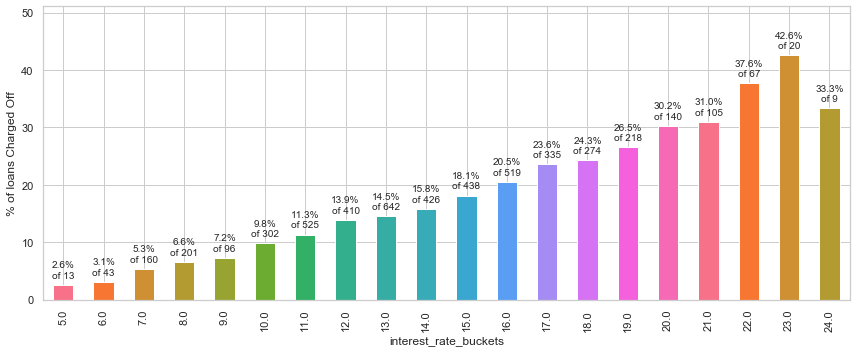

In [80]:
#for proper visibility round intereset rate
master_loan['interest_rate_buckets']=round(master_loan['int_rate'])
plt.figure(figsize=(12,5))
plotLoanStatus(master_loan, 'interest_rate_buckets')

__installment:__The monthly payment owed by the borrower if the loan originates.

In [81]:
master_loan['installment'].describe()

count   36,433.00
mean       326.19
std        207.39
min         16.08
25%        168.90
50%        283.28
75%        432.22
max      1,305.19
Name: installment, dtype: float64

<Figure size 1080x360 with 0 Axes>

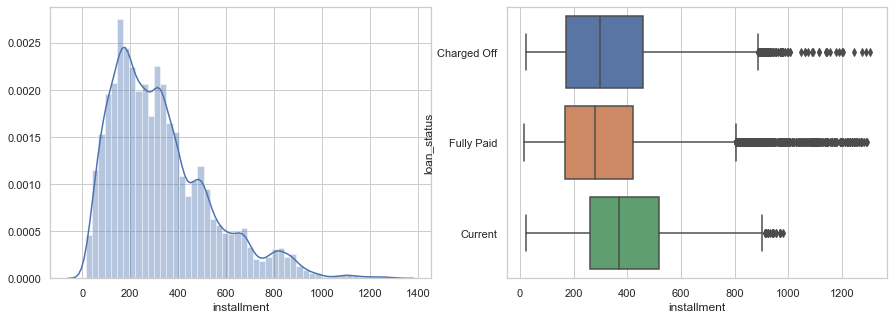

In [82]:
plt.figure(figsize=(15,5))
plot_distribution(master_loan, 'installment')

In [83]:
master_loan.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"4,943.00",338.85,214.53,22.79,172.44,298.33,458.31,"1,305.19"
Current,"1,066.00",397.27,202.87,21.74,260.89,369.21,519.22,981.45
Fully Paid,"30,424.00",321.64,205.83,16.08,167.30,278.24,422.31,"1,295.21"


__Observation:__

- loans Charged Off have high installment on average

__grade and sub_grade:__Lending Club assigned loan grade and subgrade.

In [84]:
master_loan['grade'].value_counts()

B    11035
A     9175
C     7431
D     4875
E     2650
F      969
G      298
Name: grade, dtype: int64

In [85]:
master_loan['sub_grade'].value_counts(normalize=True).head()

B3   0.07
A4   0.07
B5   0.07
A5   0.07
B4   0.06
Name: sub_grade, dtype: float64

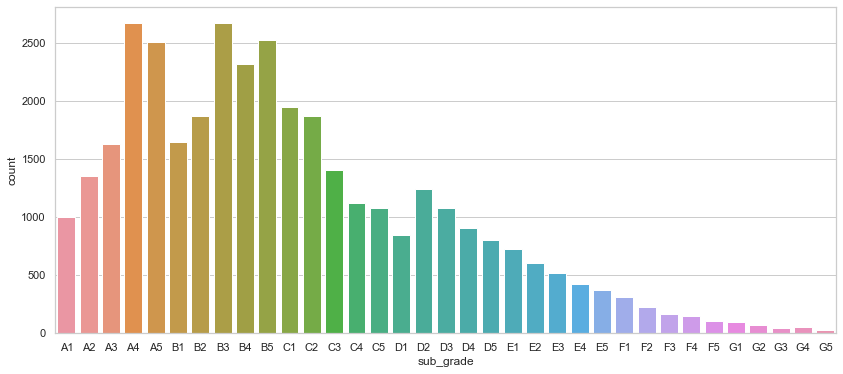

In [86]:
plt.figure(figsize=(14,6))
sns.countplot(master_loan['sub_grade'], order=sorted(master_loan['sub_grade'].unique()))
plt.show()

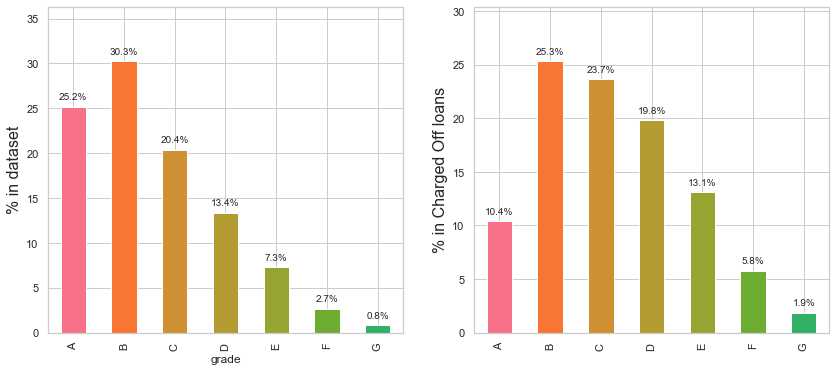

In [87]:
plt.figure(figsize=(14,6))
plot_percentages(master_loan, 'grade', True)

__Observation:__

- Grade A and B loans are safe. The percentages in full dataset are much higher than percentages in Charged Off loans.
- Grade D, E, F, G loans are less safe.
- Lending Clubs grading system is working well.

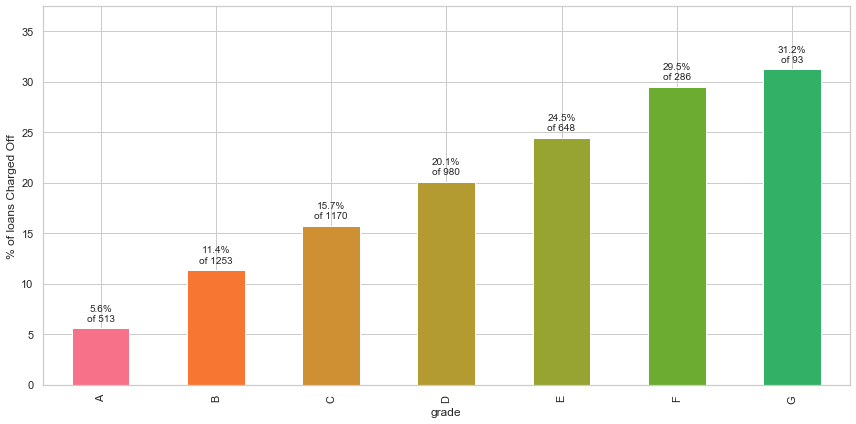

In [88]:
plt.figure(figsize=(12,6))
plotLoanStatus(master_loan, 'grade')

__Observations:__

- Nearly 30% of all loans in Grades F and G see a default.
- Grade E onwards are risky, and less numerous.

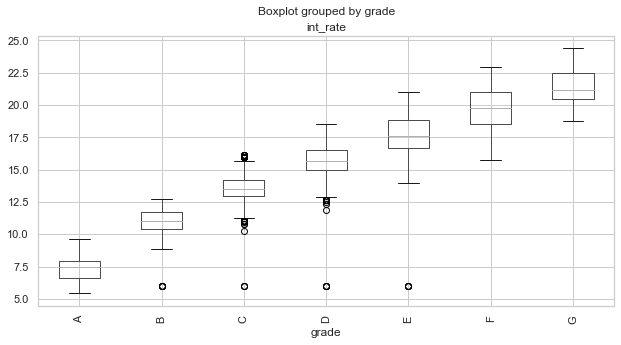

In [89]:
fig, ax = plt.subplots(figsize=(10,5))
master_loan.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

__Observation:__

- Here we see that Lending Club is, correctly, charging higher interest rates for lower grade loans.

__annual_inc:__The self-reported annual income provided by the borrower during registration.

In [90]:
master_loan['annual_inc'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

count      36,433.00
mean       69,305.22
std        63,542.44
min         4,000.00
10%        30,000.00
25%        42,000.00
50%        60,000.00
75%        83,000.00
90%       115,000.00
max     6,000,000.00
Name: annual_inc, dtype: float64

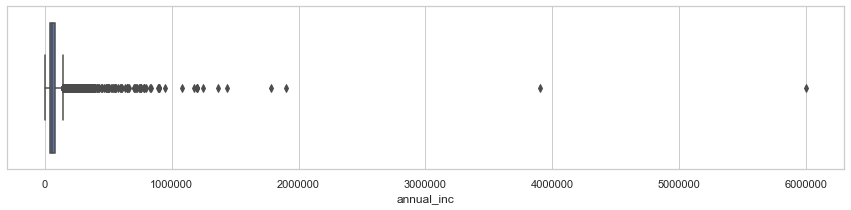

In [91]:
plt.figure(figsize=(15, 3))
sns.boxplot(x=master_loan['annual_inc'], data=master_loan)

- The annual income reprted by the borrowers range from min of 4,000 to max of 6,000,000.
- Most people have an annual income less than 115000.

In [92]:
# Let's get rid of outliers to analyze annual income. 
# Keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df_annual_inc = master_loan[np.abs(master_loan['annual_inc']-master_loan['annual_inc'].mean()) <= (3*master_loan.annual_inc.std())]

In [93]:
df_annual_inc['annual_inc'].describe()

count    36,173.00
mean     66,443.78
std      35,731.00
min       4,000.00
25%      41,600.00
50%      60,000.00
75%      82,000.00
max     259,000.00
Name: annual_inc, dtype: float64

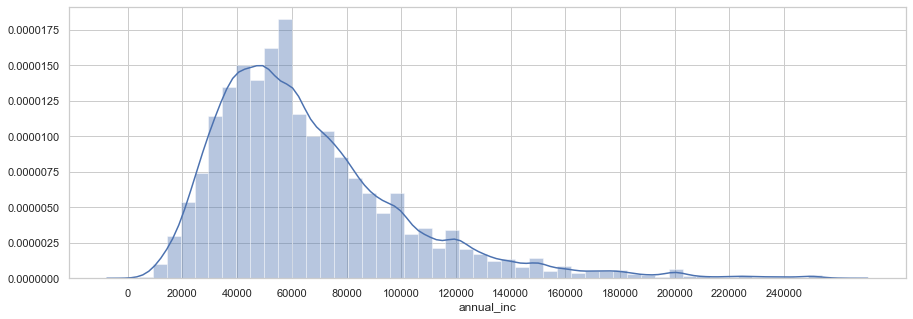

In [94]:
plt.figure(figsize=(15, 5))
sns.distplot(df_annual_inc['annual_inc'], hist_kws={'log':False})
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

In [95]:
#Create Derived categorical variable
master_loan['income_bin'] = master_loan['annual_inc']/20000
#master_loan['income_bin'] = pd.cut(master_loan['annual_inc'], [x for x in range(0, 6010000, 10000)], labels=[str(x)+'-'+str(x+10)+'k' for x in range (0, 6000, 10)])
master_loan['income_bin'] = master_loan['income_bin'].astype(int)

[Text(0, 0, '0-10k'),
 Text(1, 0, '10-20k'),
 Text(2, 0, '20-30k'),
 Text(3, 0, '30-40k'),
 Text(4, 0, '40-50k'),
 Text(5, 0, '50-60k'),
 Text(6, 0, '60-70k'),
 Text(7, 0, '70-80k'),
 Text(8, 0, '80-90k'),
 Text(9, 0, '90-100k'),
 Text(10, 0, '100-110k'),
 Text(11, 0, '110-120k'),
 Text(12, 0, '120-130k'),
 Text(13, 0, '130-140k'),
 Text(14, 0, '140-150k'),
 Text(15, 0, '150-160k'),
 Text(16, 0, '160-170k'),
 Text(17, 0, '170-180k'),
 Text(18, 0, '180-190k'),
 Text(19, 0, '190-200k'),
 Text(20, 0, '200-210k')]

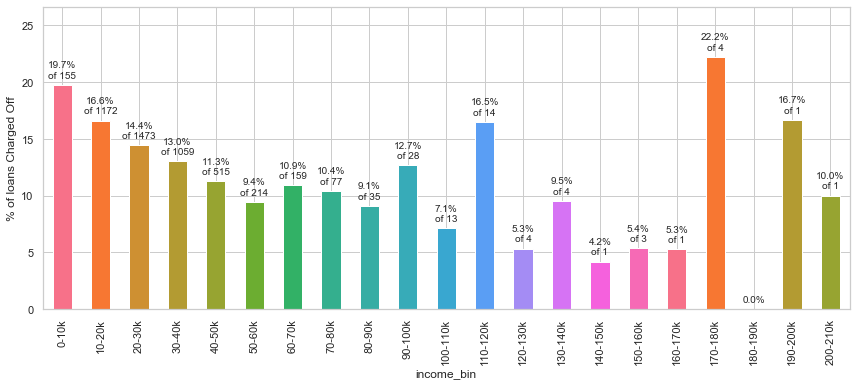

In [96]:
plt.figure(figsize=(12,5))
ax = plotLoanStatus(master_loan.loc[master_loan['income_bin']<21], 'income_bin')
ax.set_xticklabels([(str(int(x.get_text())*10)+'-'+str(int(x.get_text())*10+10)+'k') for x in ax.get_xticklabels()])

__Observatiom__:It will be interesting to see a bivariate analysis of defaults by income buckets and loan amounts later.

__verification_status:__Indicates if income was verified by LC, not verified, or if the income source was verified.

In [97]:
master_loan['verification_status'].value_counts()

Not Verified       15056
Verified           11926
Source Verified     9451
Name: verification_status, dtype: int64

Loans 'Verified' and 'Source Verified' status both imply that LC has cross checked the income value specified by the borrower and thus both statuses can be treated as one.

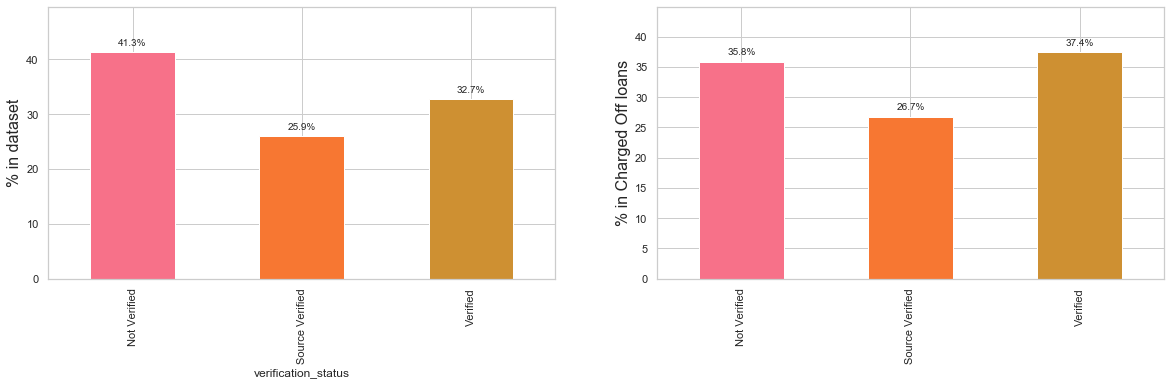

In [98]:
plt.figure(figsize=(20,5))
plot_percentages(master_loan, 'verification_status', True)

__Observation:__

- Overall, it appears that there are more 'Non Verified' loans than the 'Source Verified' and 'Verified' loans. LC should take steps to verify these loans income so as to reduce the Charge Off percentage.This is unexpected and will be investigated later in bivariate analysis.

__dti:__A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [99]:
master_loan['dti'].describe()

count   36,433.00
mean        13.44
std          6.64
min          0.00
25%          8.36
50%         13.54
75%         18.69
max         29.99
Name: dti, dtype: float64

<Figure size 720x360 with 0 Axes>

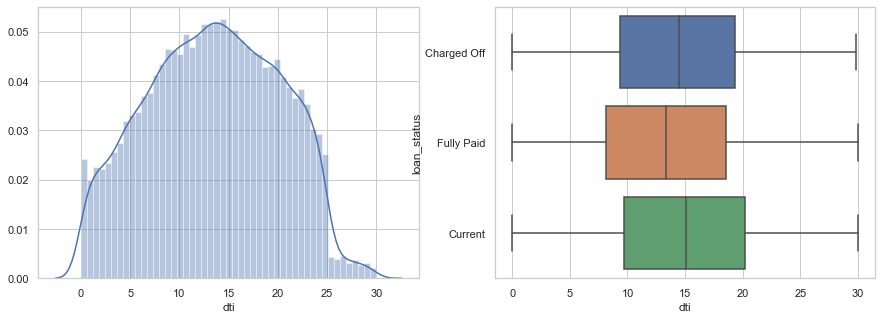

In [100]:
plt.figure(figsize=(10,5))
plot_distribution(master_loan, 'dti')

In [101]:
# Create derived variable 
master_loan['dti_bin'] = pd.cut(master_loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

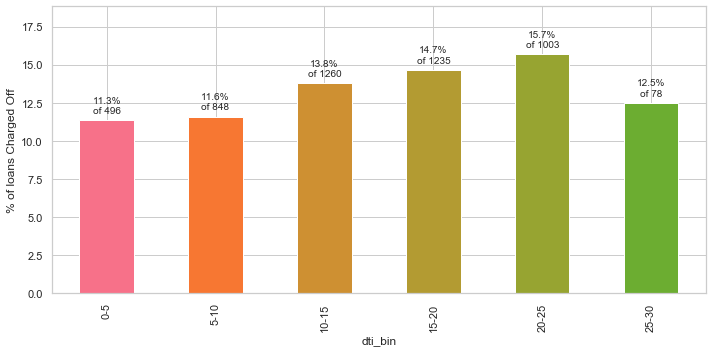

In [102]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'dti_bin')

__Observations:__

- When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off.
- Higher the dti higher the chances of loan being Charged Off.

__delinq_2yrs:__The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.

In [103]:
master_loan['delinq_2yrs'].value_counts(normalize=True)

0    0.89
1    0.08
2    0.02
3    0.01
4    0.00
5    0.00
6    0.00
7    0.00
8    0.00
11   0.00
9    0.00
Name: delinq_2yrs, dtype: float64

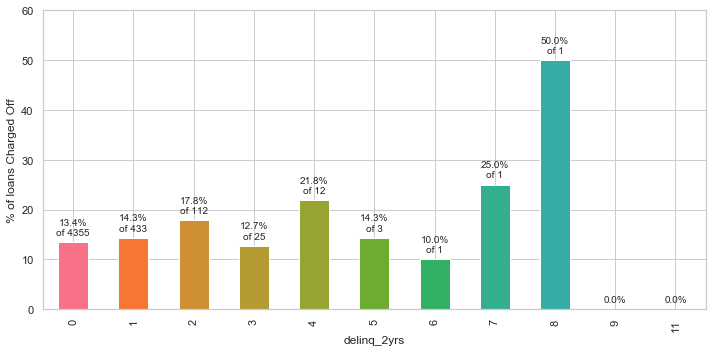

In [104]:
plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'delinq_2yrs')

__Observation:__

- The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years values ranges between 0 and 11.
- There are higher chances of default if this variable is greater than 1.

__earliest_cr_line:__The month the borrower's earliest reported credit line was opened.

In [105]:
master_loan['earliest_cr_line_year'].value_counts(normalize=True).head()

2000   0.08
1999   0.08
1998   0.07
2001   0.06
1997   0.06
Name: earliest_cr_line_year, dtype: float64

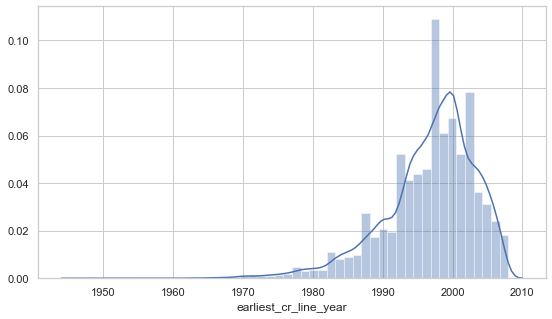

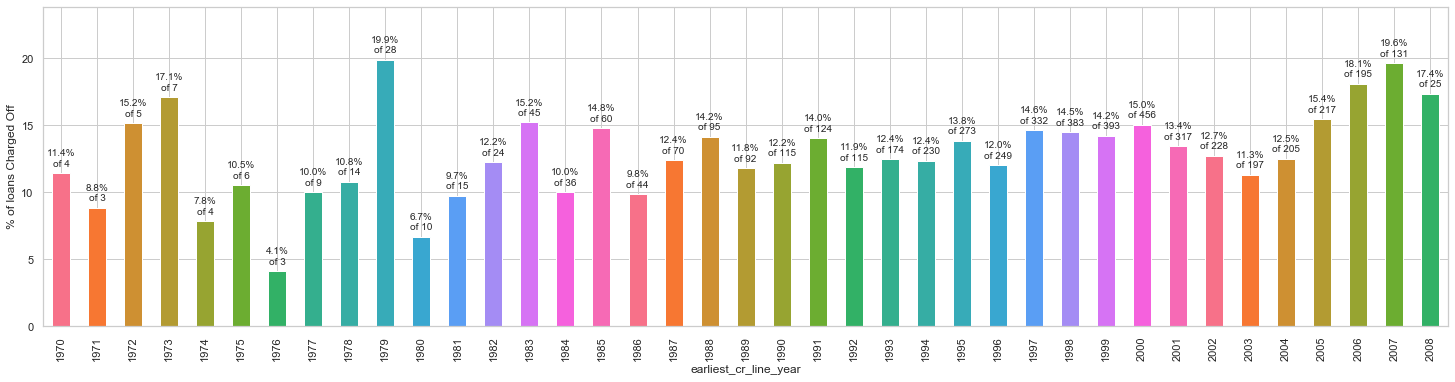

In [106]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
#sns.countplot(master_loan['earliest_cr_line_year'], order=sorted(master_loan.issue_d_year.unique()))
sns.distplot(master_loan['earliest_cr_line_year'])
#plt.subplot(1, 2, 2)
#sns.countplot(master_loan['earliest_cr_line_month'], order=sorted(master_loan.issue_d_month.unique()))
#plt.show()

plt.figure(figsize=(40,10))
plt.subplot(2, 2, 1)
plotLoanStatus(master_loan.loc[master_loan['earliest_cr_line_year'] > 1969], 'earliest_cr_line_year')
plt.show()

__Observation:__


- Newer borrowers are defauling more often. This is possibly related to the 2008 subprime crisis.
- There was another economic crisis in US beginning in 1978 with double digit inflation. Newer borrowers of that time too defaulted more often. In general, those who take their first loans at times of recession, presumably young people, default more often. But this variable can be ignored in our analysis.

<b>open_acc:</b>The number of open credit lines in the borrower's credit file.

In [107]:
master_loan.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"4,943.00",9.31,4.49,2.00,6.00,9.00,12.00,38.00
Current,"1,066.00",10.00,4.29,2.00,7.00,9.00,12.00,32.00
Fully Paid,"30,424.00",9.34,4.36,2.00,6.00,9.00,12.00,44.00


__Observation:__

- The median of the distribution sugests that by large the borrower's seem to have 9 open credit lines.
- There is no significant difference in the credit lines of charged off and fully paid loans.

__pub_rec:__ Number of derogatory public records.

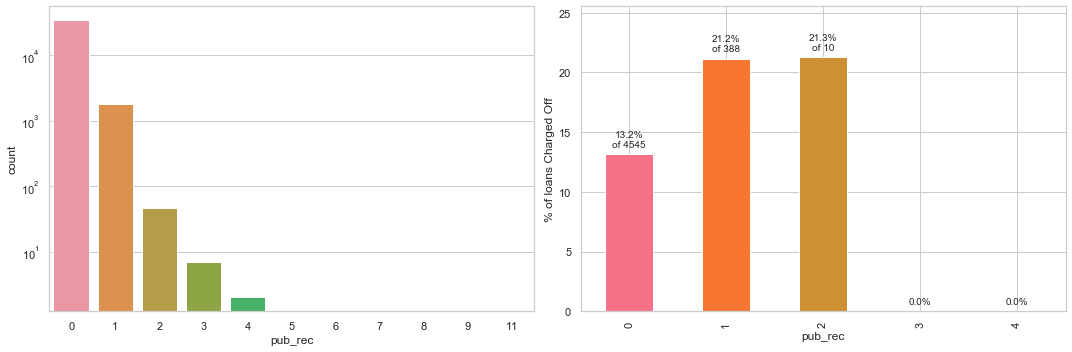

In [108]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
c=sns.countplot(master_loan['pub_rec'], order=sorted(master_loan.delinq_2yrs.unique()))
c.set_yscale('log')

plt.subplot(1, 2, 2)
plotLoanStatus(master_loan, 'pub_rec')
plt.show()

__Observation:__

- 94% have no Public derogatory records. 5% have 1 derogatory record.
- Having even 1 derogatory record increases the chances of Charge Off significantly.

__revol_util:__Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [109]:
master_loan['revol_util'].describe()

count   36,433.00
mean        49.28
std         28.19
min          0.00
25%         26.10
50%         49.90
75%         72.70
max         99.90
Name: revol_util, dtype: float64

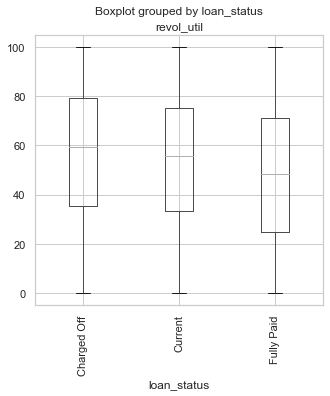

In [110]:
fig, ax = plt.subplots(figsize=(5,5))
df_annual_inc.boxplot(column=['revol_util'],by='loan_status', ax=ax, rot=90)

The average utilization rate is around 49%.This requires more analysis.

In [111]:
master_loan['revol_util_bin'] = round(master_loan['revol_util']/5)

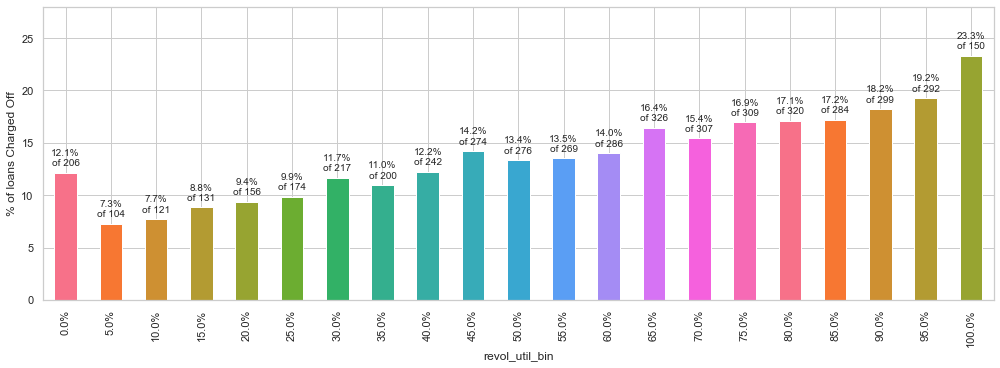

In [112]:
plt.figure(figsize=(14,5))
ax = plotLoanStatus(master_loan, 'revol_util_bin')
ax.set_xticklabels([(str(float(x.get_text())*5)+'%') for x in ax.get_xticklabels()])
plt.show()

<b>Derived variable - ratio of loan amount to annual income</b>

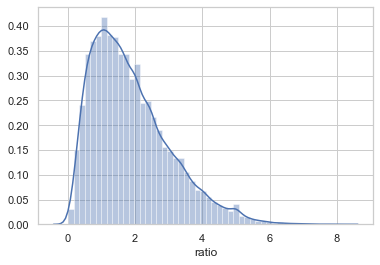

In [113]:
master_loan['ratio'] = master_loan['loan_amnt'] * 10 / master_loan['annual_inc']
sns.distplot(master_loan['ratio'])

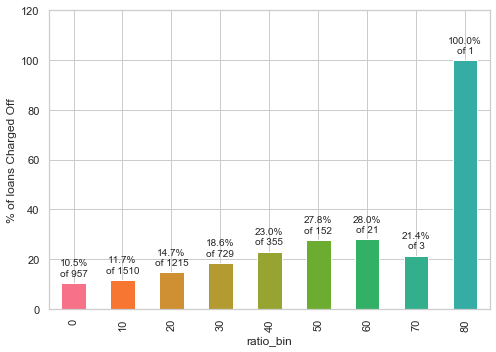

In [114]:
master_loan['ratio_bin'] = (master_loan['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
plotLoanStatus(master_loan, 'ratio_bin')

__Observation:__ As long as loan amount is less than 20% of annual income, defaults are low.

### Bivariate Analysis

__Avg. loan_amnt over time__

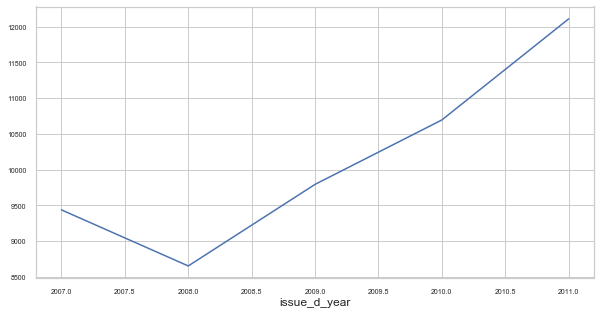

In [115]:
plt.figure(figsize=(10,5))
master_loan.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

__Observation:__Average loan amount dropped sharply when subprime mortgage crisis hit

__loan_amnt and annual_inc__

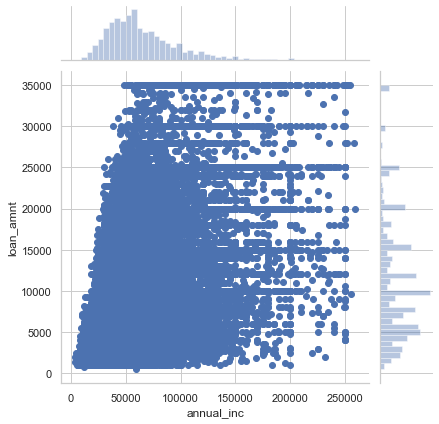

In [116]:
sns.jointplot('annual_inc', 'loan_amnt', master_loan.loc[master_loan['annual_inc']<260000])
plt.show()

__Observation:__There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans.

__annual income with grade:__

<Figure size 1080x720 with 0 Axes>

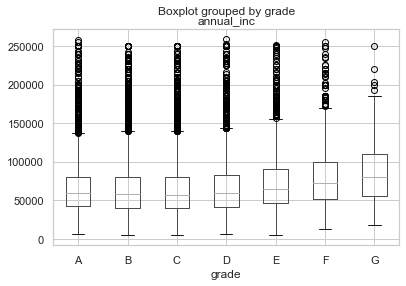

In [117]:
plt.figure(figsize=(15,10))
master_loan.loc[master_loan['annual_inc']<260000].boxplot(column='annual_inc', by='grade')
plt.show()

__loan_amnt vs verification_status vs loan status:__

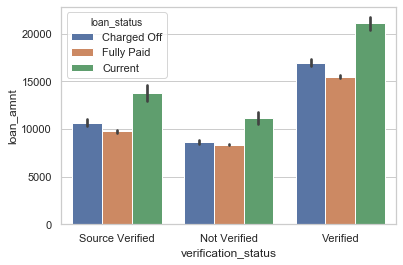

In [118]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=master_loan, estimator=np.mean)

__Observation:__

- Higher loan amounts are Verified more often.
- We already know that larger loans are less in number, but see a higher charge off rate.
- It's not the verified status per se, it's the fact that higher loan amounts are riskier and are also verified more often by Lending Club.


__Interest Rate and Sub Grade:__

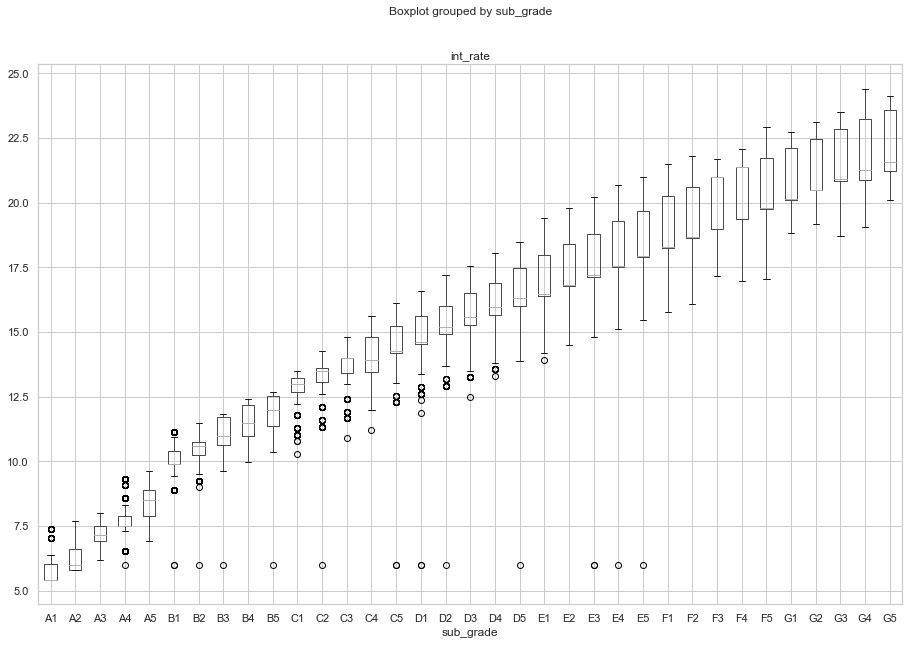

In [119]:
master_loan.boxplot(column='int_rate', by='sub_grade',figsize=(15,10))
plt.show()

__Observation:__Intrest rates varies directly with the subgrade. Larger or worst the sub grade, higher are the rate of intrest for the loan.

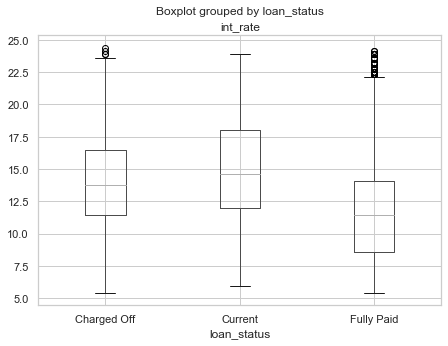

In [120]:
master_loan.boxplot(column='int_rate', by='loan_status',figsize=(7,5))

__Observation:__Loans at a higher intrest rate are more likely to be Charged Off.

__Loan amount vs Grade vs Term__

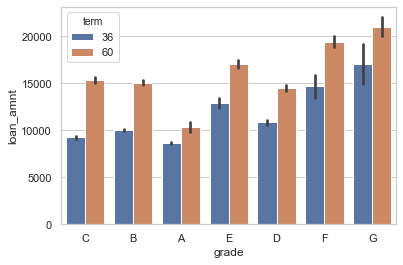

In [121]:

sns.barplot(x='grade', y='loan_amnt', hue="term", data=master_loan, estimator=np.mean)
plt.show()

__Observation:__Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with lower grade for longer terms.

__Loan amount Vs term Vs Loan Status:__

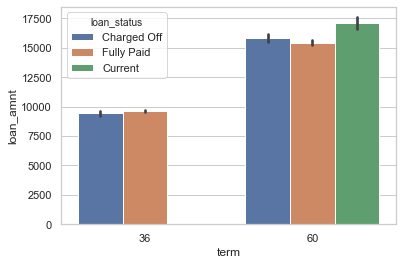

In [122]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=cleaned_loan, estimator=np.mean)
plt.show()

__Observation:__Our assumption made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.

__Loan amount Vs addr_state vs loan Status__

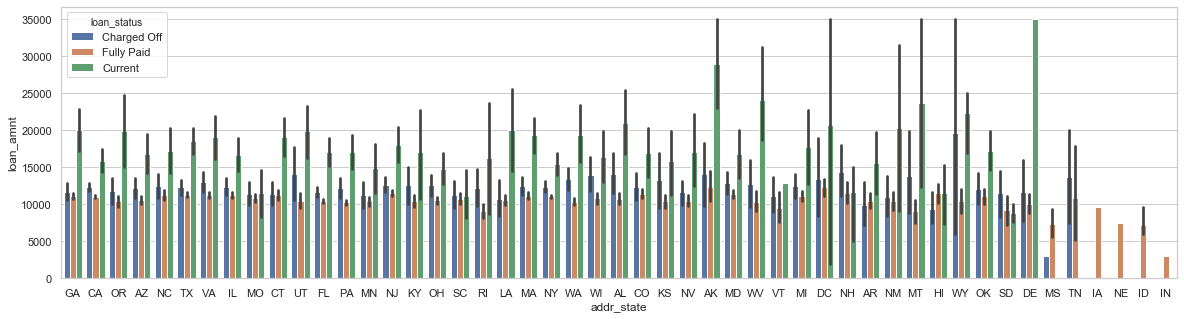

In [123]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=master_loan, estimator=np.mean)
plt.show()

__Observation:__
States WY: Wyoming has the the highest average loan amount that was charged off. whats happening in this state is somthing LC can investigate into for this state.

__revol_rate Vs int_rate__:

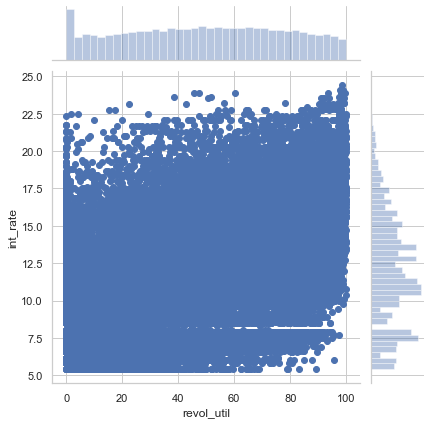

In [124]:
sns.jointplot('revol_util', 'int_rate', master_loan)

In [125]:
corr=master_loan.corr()
corr['loan_amnt']

loan_amnt                  1.00
term                       0.36
int_rate                   0.31
installment                0.93
emp_length                 0.15
annual_inc                 0.26
dti                        0.07
delinq_2yrs               -0.03
inq_last_6mths             0.01
open_acc                   0.17
pub_rec                   -0.05
revol_bal                  0.32
revol_util                 0.07
total_acc                  0.26
out_prncp                  0.19
out_prncp_inv              0.19
total_pymnt                0.89
total_pymnt_inv            0.87
total_rec_prncp            0.85
total_rec_int              0.73
total_rec_late_fee         0.04
recoveries                 0.14
collection_recovery_fee    0.08
last_pymnt_amnt            0.45
pub_rec_bankruptcies      -0.03
earliest_cr_line_year     -0.20
earliest_cr_line_month    -0.02
issue_d_month              0.07
issue_d_year               0.13
interest_rate_buckets      0.31
income_bin                 0.26
revol_ut

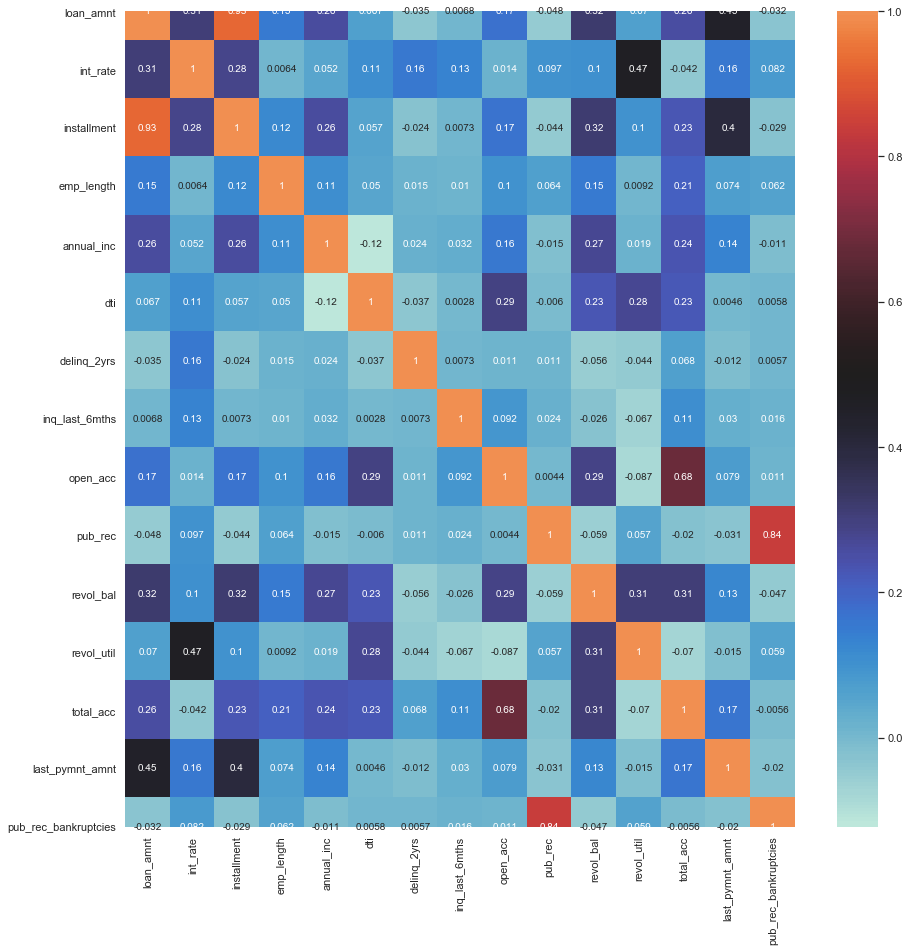

In [126]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment',
       'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corr = master_loan[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)

__Observation:__

- loan_amnt is correlated to last_payment_amount with r factor.44, as expected
- int_rate is correlated to revol_util with r factor of .47 - This is good, as company is charging higher interest from riskier loan.
- delinq_2yrs is totally un-correlated with public record of bankruptcy. Therefore they represent distinct features with individual predictive value.

In [127]:
master_loan[['pub_rec', 'pub_rec_bankruptcies']].corr()

,pub_rec,pub_rec_bankruptcies
pub_rec,1.00,0.84
pub_rec_bankruptcies,0.84,1.00


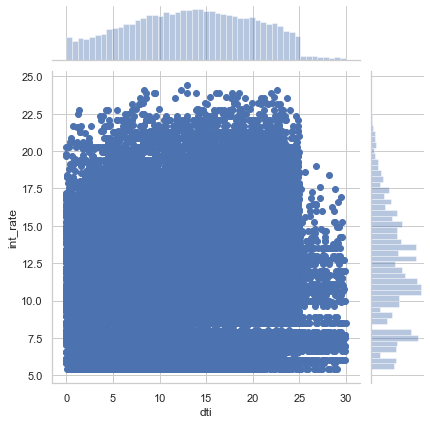

In [128]:
sns.jointplot('dti', 'int_rate', master_loan)

__delinq_2yr VS loan amount VS grade:__

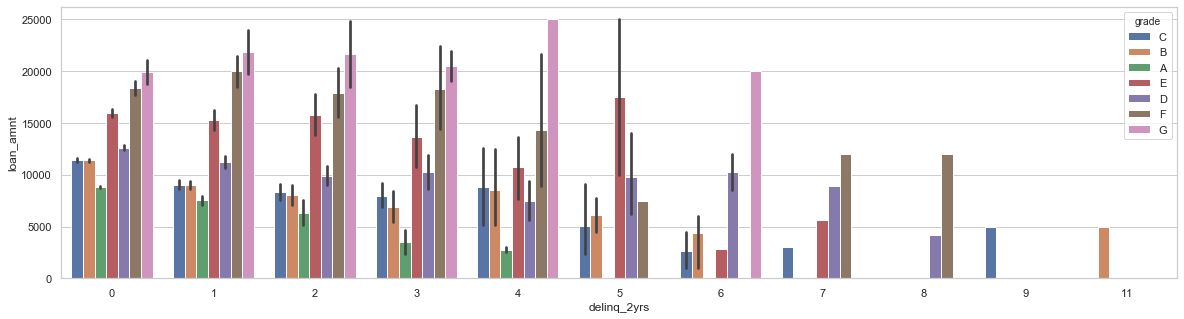

In [129]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=master_loan, estimator=np.mean)
plt.show()

__Observation:__

- Not many loans receive invstment with higher number of delinquencies(>3). Despite the low loan amount request, these loans are considered risky and are not invested much in.
- Lending club should further restrict their investment. We see loan amounts of >15000 on average for people having >=2 delinquencies.